In [34]:
# Importing 'pandas' and 'numpy' library

import pandas as pd
import numpy as np

In [35]:
# Importing 'Customer Purchasing Behaviour' dataset

Cpb = pd.read_csv("CPB.csv")

In [36]:
# Viewing the top 5 rows of the dataset to get the overall profile of dataset

print(Cpb.head())

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


In [37]:
# Viewing the bottom 5 rows of the dataset to get the overall profile of dataset

print(Cpb.tail())

     user_id  age  annual_income  purchase_amount  loyalty_score region  \
233      234   40          60000              450            7.2   West   
234      235   38          59000              430            6.9  North   
235      236   54          74000              630            9.4  South   
236      237   32          52000              360            5.8   West   
237      238   31          51000              340            5.6  North   

     purchase_frequency  
233                  20  
234                  20  
235                  27  
236                  18  
237                  17  


In [38]:
# Data sanity check ensuring that there are no 'Null' values in the dataset

print(Cpb.isnull().sum())


user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64


In [39]:
# Checking for duplicate rows in the dataset, ensuring that there are no row repetition

print(Cpb.duplicated().sum())

0


In [40]:
# Checking for data types for each header to ensure that the data type is consistent

print(Cpb.dtypes)


user_id                 int64
age                     int64
annual_income           int64
purchase_amount         int64
loyalty_score         float64
region                 object
purchase_frequency      int64
dtype: object


In [41]:
# Converting the column 'region' with data type as object into binaries resolving for multi-collinearity issue

Cpb = pd.get_dummies(Cpb, columns=['region'], drop_first=True)

In [42]:
# Check skewness for selected columns - As per the output the skewness of headers 'purchase_amount' and 'annual_income'

selected_columns = ['purchase_amount', 'annual_income']
skewness_values = Cpb[selected_columns].skew()

print(skewness_values)


purchase_amount   -0.242574
annual_income     -0.494132
dtype: float64


In [43]:
# Addressing the issue of more skewness in the header 'annual_income'

Cpb['annual_income_log'] = np.log(Cpb['annual_income'] + 1)

In [44]:
# Standardizing the data for the concerned columns below for better adaptability for gradient boosting and neural networks

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Cpb[['age', 'annual_income_log', 'purchase_amount', 'purchase_frequency']] = scaler.fit_transform(Cpb[['age', 'annual_income_log', 'purchase_amount', 'purchase_frequency']])


In [45]:
# Split the data into train and test dataset

from sklearn.model_selection import train_test_split

X = Cpb.drop(['loyalty_score', 'user_id', 'annual_income'], axis=1)  # Features
y = Cpb['loyalty_score']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Importing the model 'Linear Regression' and fitting the portion of the dataset for training

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
# Importing 'Random Forest Regressor' model and fitting training dataset

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [48]:
# Evaluating linear regression model's performance via 'Mean Squared Error'

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.03536949260353594


In [49]:
# Evaluating random forest regression model's performance via 'Mean Squared Error'

from sklearn.metrics import mean_squared_error

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# As per the output random forest regression model seems to perform better than linear regression model given less mean squared error

Mean Squared Error: 0.001535791666666708


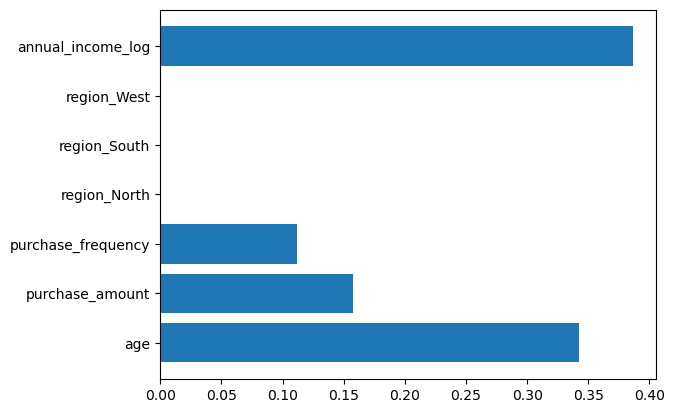

In [50]:
#Viewing the importance metric of the features used in predicting the y variable (Loyalty_score)
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
plt.barh(X.columns, importances)
plt.show()


In [51]:
# Conclusion: 
# 1. Basis the mean squared error evaluated on the models above, 'Random Forest Regression' performed better with the mean square error of '~0.0015'.
#2. 'annual_income_log' (converted form of column 'annual_income to address the skewness) and 'age' features were leading in predicting the y variable (Loyalty_score).